In [10]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

sns.set(rc={"figure.dpi": 300, "savefig.dpi": 300})
sns.set_style("ticks")

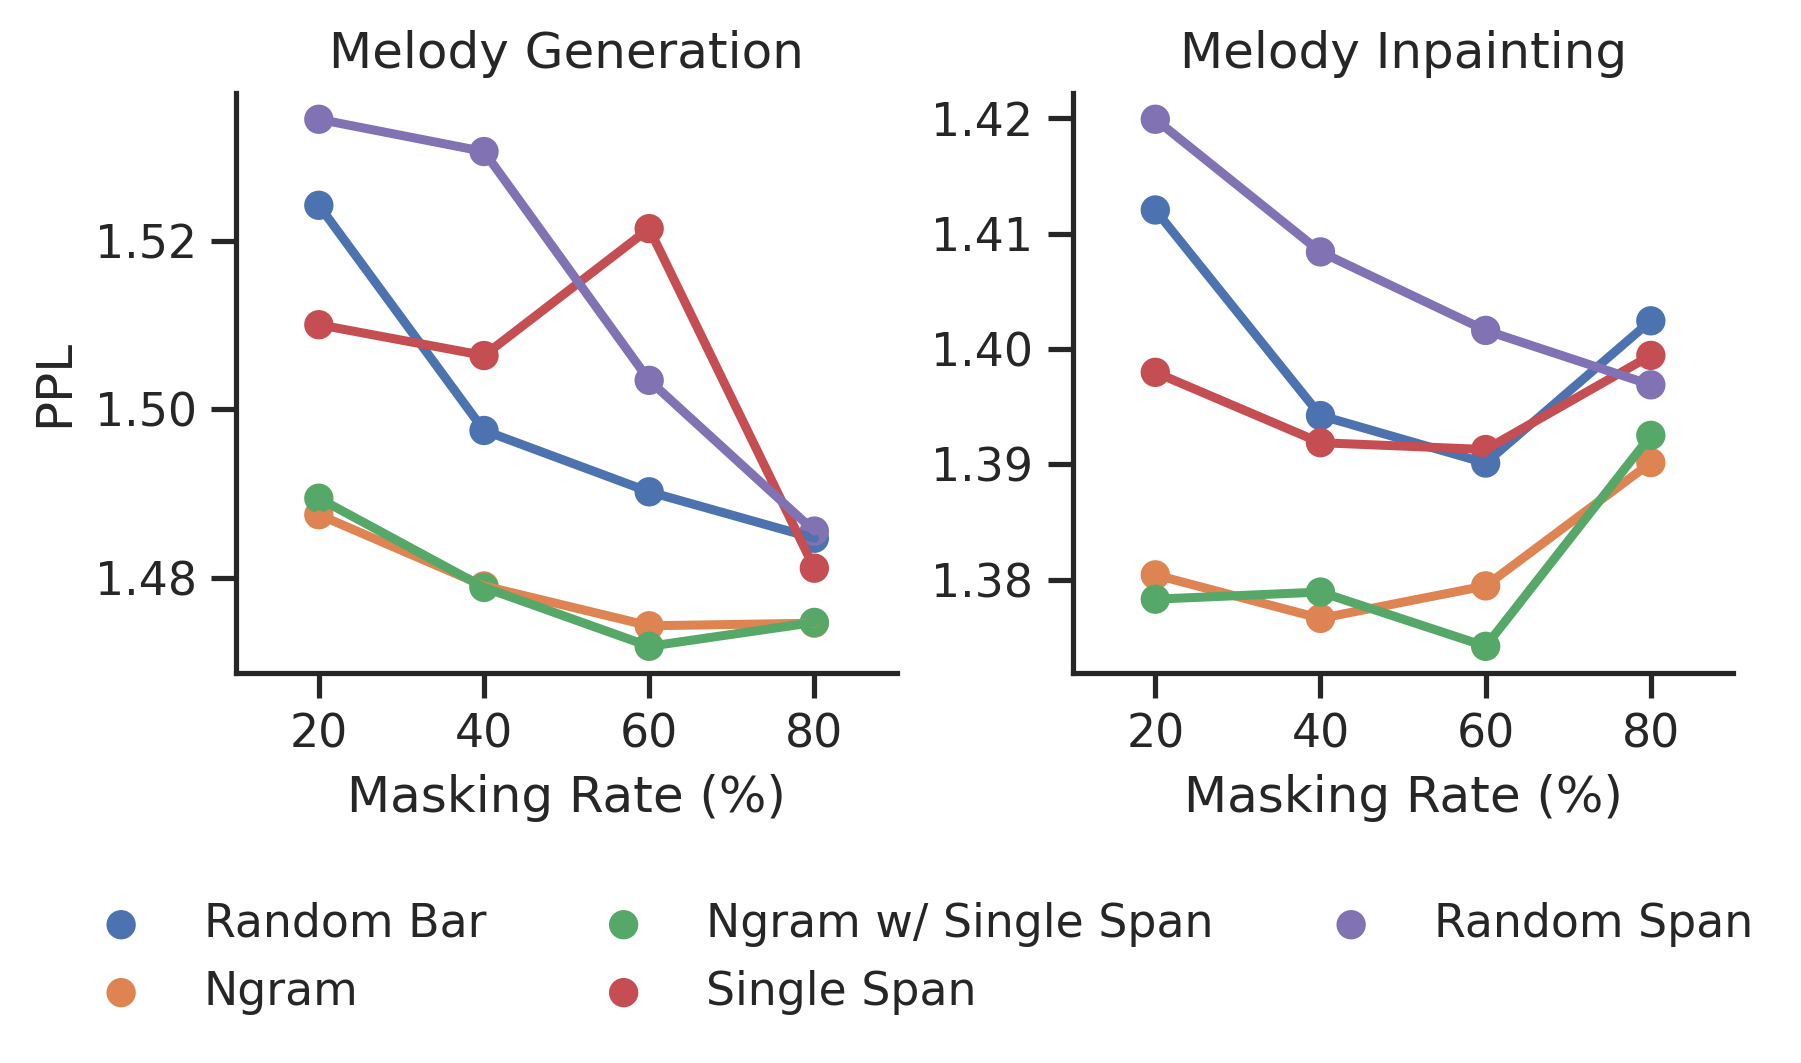

In [11]:
merged_csv_path = os.path.join("experiment", "result", "ppl.csv")
merged_data = pd.read_csv(merged_csv_path)

masking_rate_data = merged_data[(merged_data.rate != 0) & (merged_data.rate != 100)]
task_order = sorted(masking_rate_data.task.unique())
masking_order = sorted(masking_rate_data.masking.unique())
rate_order = sorted(masking_rate_data.rate.unique())
g = sns.FacetGrid(
    masking_rate_data,
    col="task",
    hue="masking",
    sharey=False,
    col_order=task_order,
    hue_order=masking_order,
    legend_out=True,
    aspect=1.1,
)
g.map(sns.pointplot, "rate", "value", order=rate_order, scale=0.8)
g.set_xlabels("Masking Rate (%)")
g.set_ylabels("PPL")
g.axes.flat[0].set_title("Melody Generation")
g.axes.flat[1].set_title("Melody Inpainting")
g.add_legend(title="", loc="lower center", ncol=3, bbox_to_anchor=(0.33, -0.2))
label_map = {
    "bar": "Random Bar",
    "ngram-multi": "Ngram",
    "ngram-multi-single": "Ngram w/ Single Span",
    "single": "Single Span",
    "span": "Random Span",
}
for legend in g._legend.texts:
    legend.set_text(label_map[legend.get_text()])


In [12]:
pretrain_method_data = merged_data[
    (merged_data.rate == 0)
    | (merged_data.rate == 100)
    | ((merged_data.masking == "ngram-multi-single") & (merged_data.rate == 60))
].copy()
task_order = sorted(pretrain_method_data.task.unique())

label_map = {
    "from-scratch": "No\nPretraining",
    "gpt": "Decoder-only\nPretraining",
    "ngram-multi-single": "Ours",
}
masking_order = list(label_map.values())
pretrain_method_data.masking = pretrain_method_data.masking.map(label_map)
pretrain_method_data = pretrain_method_data.reset_index(drop=True)
pretrain_method_data

,masking,rate,task,value
0,Ours,60,finetune_clm,1.471879
1,Ours,60,finetune_infilling,1.374232
2,No\nPretraining,0,finetune_clm,2.051205
3,No\nPretraining,0,finetune_infilling,1.907040
4,Decoder-only\nPretraining,100,finetune_clm,1.479514
5,Decoder-only\nPretraining,100,finetune_infilling,1.478755


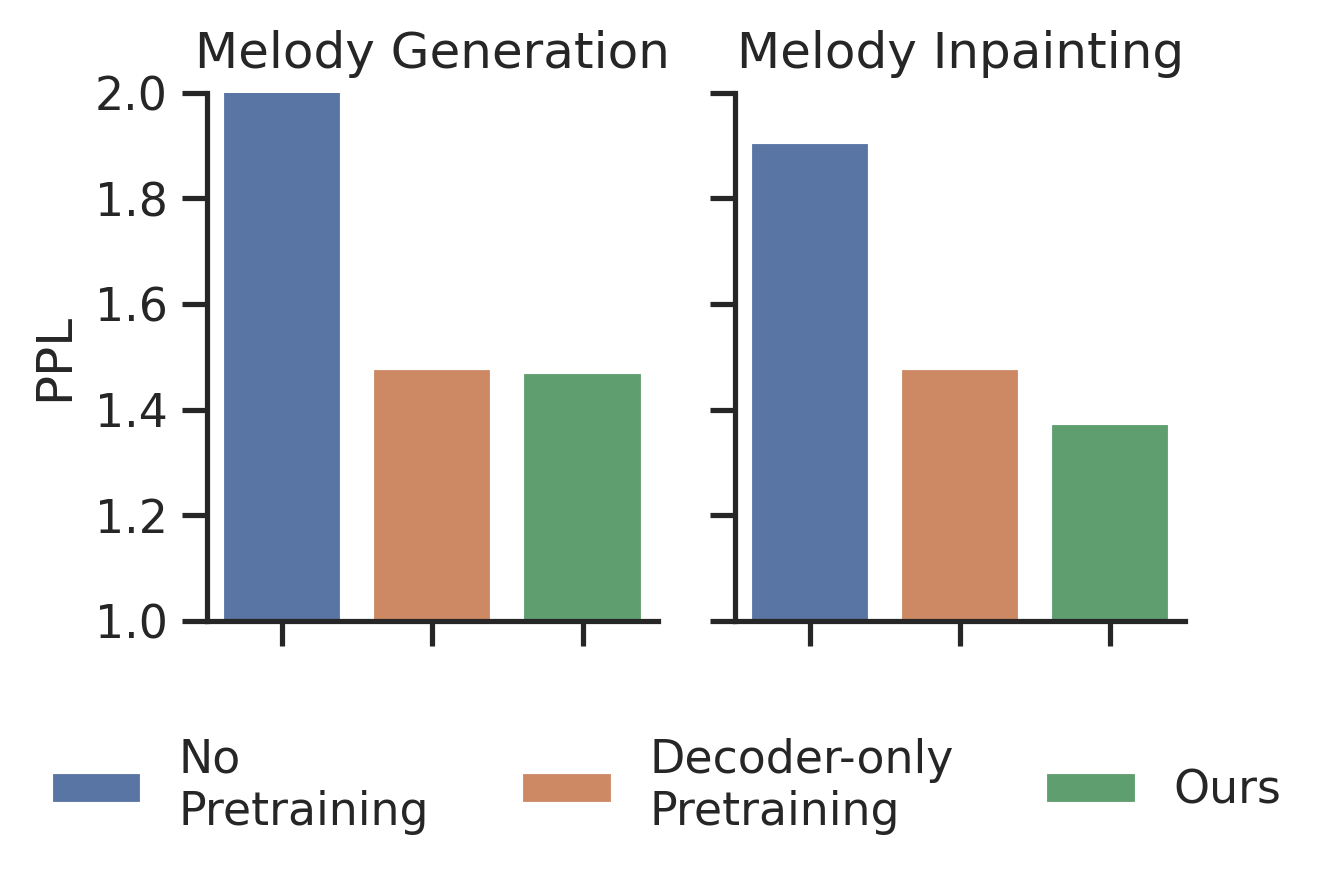

In [13]:
g = sns.FacetGrid(
    pretrain_method_data,
    col="task",
    hue="masking",
    col_order=task_order,
    hue_order=masking_order,
    legend_out=True,
    aspect=0.8,
)
g.map(sns.barplot, "masking", "value", order=masking_order)
g.set_xlabels("")
g.set_xticklabels("")
g.set_ylabels("PPL")
g.set(ylim=(1.0, 2.0))
g.axes.flat[0].set_title("Melody Generation")
g.axes.flat[1].set_title("Melody Inpainting")
g.add_legend(title="", loc="lower center", ncol=3, bbox_to_anchor=(0.33, 0))

In [14]:
infilling_csv_path = os.path.join("experiment/ablation_infilling", "result", "ppl.csv")
infilling_data = pd.read_csv(infilling_csv_path)
base_data = infilling_data[(infilling_data.var_0 == "ngram-multi") & (infilling_data.var_1 == 60)].copy()
base_data["ngram_type"] = "Independent"
base_data["max_ngram_length"] = 12

ngram_csv_path = os.path.join("experiment/ablation_ngram", "result", "ppl.csv")
ngram_data = pd.read_csv(ngram_csv_path)
ngram_data.loc[ngram_data.var_0 == "ngram-4", "ngram_type"] = "Independent"
ngram_data.loc[ngram_data.var_0 == "ngram-8", "ngram_type"] = "Independent"
ngram_data.loc[ngram_data.var_0 == "ngram-mixed", "ngram_type"] = "Joint"
ngram_data.loc[ngram_data.var_0 == "ngram-4", "max_ngram_length"] = 4
ngram_data.loc[ngram_data.var_0 == "ngram-8", "max_ngram_length"] = 8
ngram_data.loc[ngram_data.var_0 == "ngram-mixed", "max_ngram_length"] = 12
ngram_data = pd.concat([base_data, ngram_data], axis=0)
ngram_data = ngram_data.drop(columns=["var_0", "var_1"])
ngram_data.max_ngram_length = ngram_data.max_ngram_length.astype(int)
ngram_data

,task,value,ngram_type,max_ngram_length
12,finetune_clm,1.474315,Independent,12
13,finetune_infilling,1.379470,Independent,12
0,finetune_clm,1.481658,Independent,4
1,finetune_infilling,1.383832,Independent,4
2,finetune_clm,1.476179,Independent,8
3,finetune_infilling,1.378242,Independent,8
4,finetune_clm,1.480358,Joint,12
5,finetune_infilling,1.383536,Joint,12


/root/anaconda3/envs/pytorch/lib/python3.8/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Text(0.5, 1.0, 'Melody Inpainting')

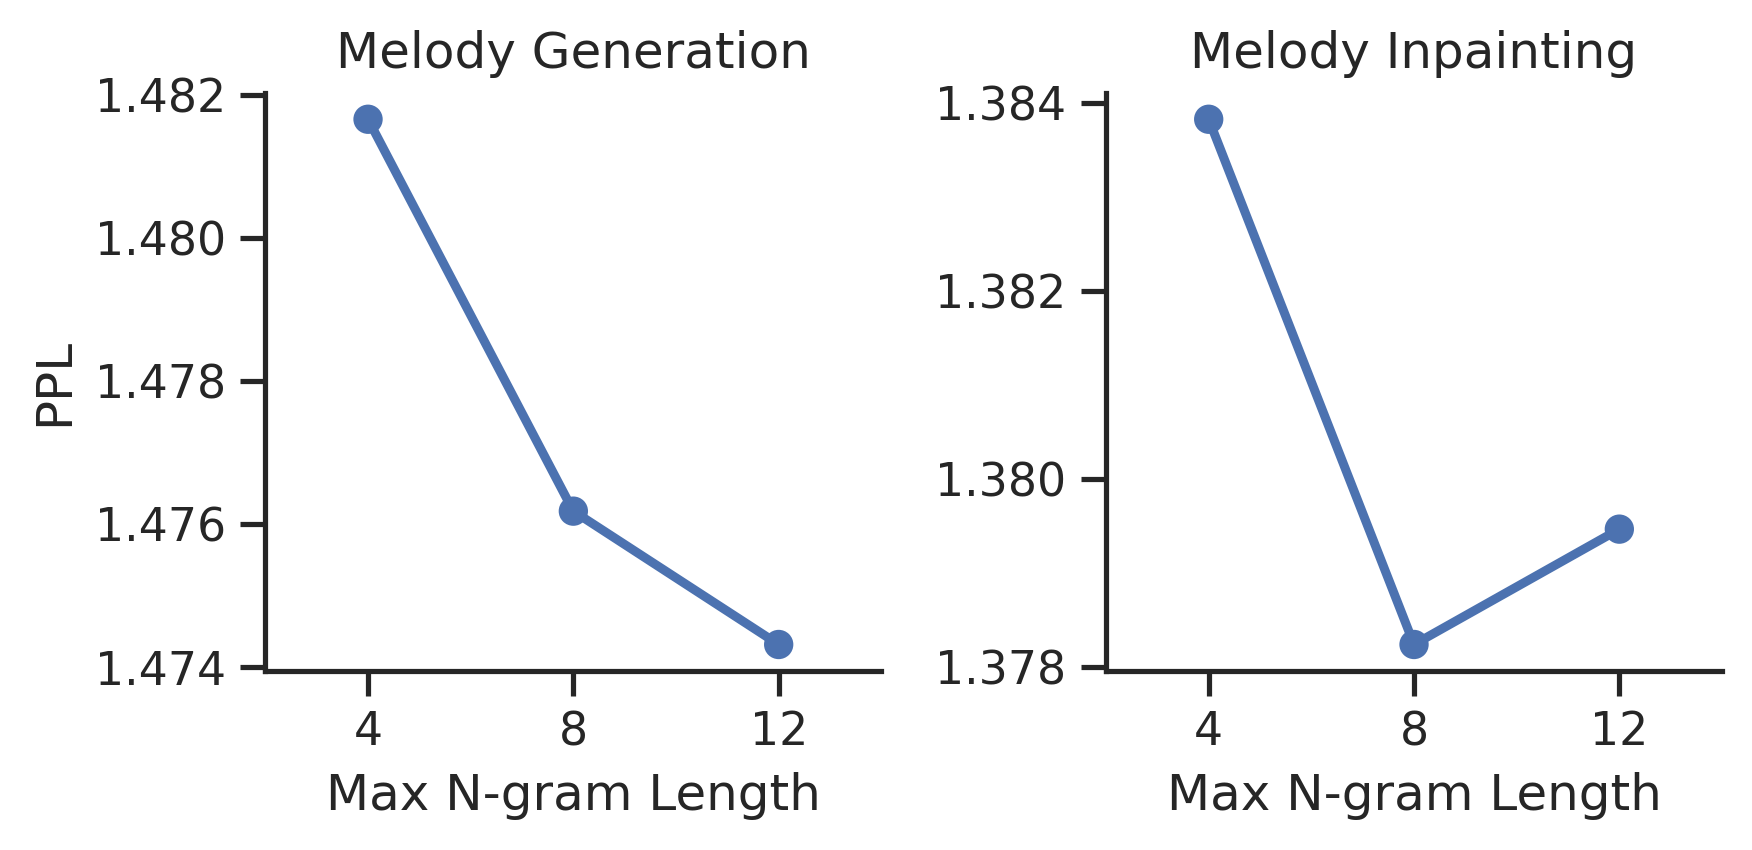

In [15]:
task_order = sorted(ngram_data.task.unique())
length_order = sorted(ngram_data.max_ngram_length.unique())
g = sns.FacetGrid(
    ngram_data[ngram_data.ngram_type == "Independent"],
    col="task",
    col_order=task_order,
    sharey=False,
    aspect=1,
)
g.map(sns.pointplot, "max_ngram_length", "value", scale=0.8)
g.set_xlabels("Max N-gram Length")
g.set_ylabels("PPL")
g.axes.flat[0].set_title("Melody Generation")
g.axes.flat[1].set_title("Melody Inpainting")

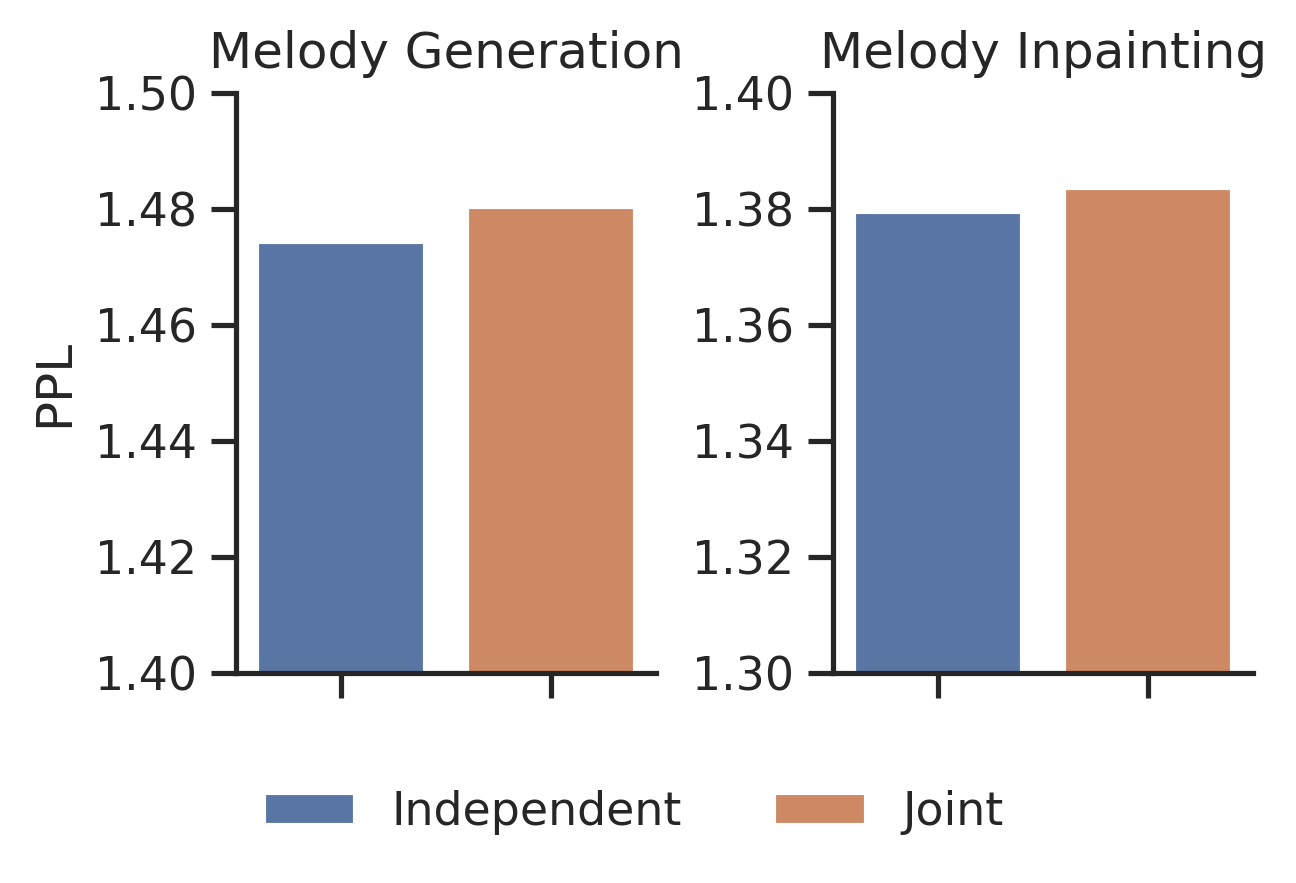

In [16]:
task_order = sorted(ngram_data.task.unique())
ngram_type_order = sorted(ngram_data.ngram_type.unique())
g = sns.FacetGrid(
    ngram_data[ngram_data.max_ngram_length == 12],
    col="task",
    hue="ngram_type",
    col_order=task_order,
    hue_order=ngram_type_order,
    sharey=False,
    aspect=0.8,
)
g.map(sns.barplot, "ngram_type", "value", order=ngram_type_order)
g.set_xlabels("")
g.set_xticklabels("")
g.set_ylabels("PPL")
g.axes.flat[0].set_title("Melody Generation")
g.axes.flat[0].set(ylim=(1.4, 1.5))
g.axes.flat[1].set_title("Melody Inpainting")
g.axes.flat[1].set(ylim=(1.3, 1.4))
g.add_legend(title="", loc="lower center", ncol=3, bbox_to_anchor=(0.36, 0))